In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
%load_ext zipline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


In [8]:
rcParams['figure.figsize'] = 10, 5

## The Basic Setup

You can use the cell magic

`%%zipline -s <start-date> -e <end-date> -b <pricing-data> -o <output pickle> --capital-base <dollars>`

to run a simulation. The entire code of the strat must be in the cell.

In [9]:
%%time
%%capture --no-stdout
%%zipline -s 2016-1-1 -e 2018-1-1 -b treasury-futures -o outfile.pickle --capital-base 1e7

from zipline.api import symbol, order_target_percent, record

def handle_data(context, data):
    order_target_percent(symbol('US1'), 1.0)
    record(US1_avg=data.history(symbol('US1'), 'close', 20, '1d').mean())
    record(US1=data.current(symbol('US1'), 'close'))

CPU times: user 1.11 s, sys: 33.2 ms, total: 1.14 s
Wall time: 1.14 s


Then you read in the output pickled dataframe, and can access sim items like `pnl` and the strategy NAV which is called `portfolio_value`.

In [10]:
df = pd.read_pickle('outfile.pickle')

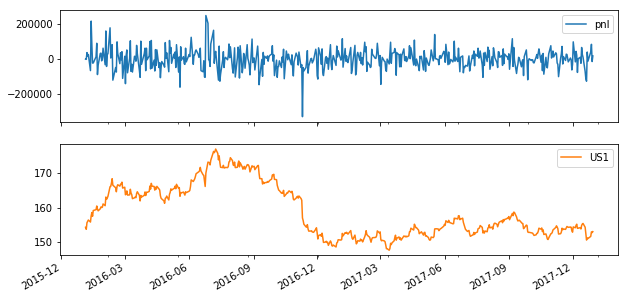

In [11]:
df[['pnl', 'US1']].plot(subplots=True);

## API


- initialize(context)
- before_trading_start(context, data)
- handle_data(context, data)
- schedule_function(...)
- date_rules
- time_rules
- order
- order_target
- order_target_percent
- get_datetime
- symbol()
- get_open_orders
- cancel_order
- data.history
- data.current
- context.portfolio
- record
- slippage

- futures stuff? continuous futures?



In [14]:
%%time
%%zipline -s 2018-1-1 -e 2018-1-5 -b futures -o outfile.pickle --capital-base 1e7

    from zipline.api import symbol, order_target_percent, record, future_symbol, continuous_future

    def initialize(context):
        #context.my_cf = continuous_future('A6', roll='calendar')
        pass

    def handle_data(context, data):

        fut = future_symbol('A6F18')
        import pdb; pdb.set_trace()
        #order_target_percent(symbol('US1'), 1.0)
        record(price=data.current(future_symbol('A6F18'), 'close'))


KeyError: "Disk-based ctable opened with `r`ead mode yet `rootdir='/Users/jonathan/.zipline/data/futures/2018-09-20T23;09;04.461188/daily_equities.bcolz'` does not exist"